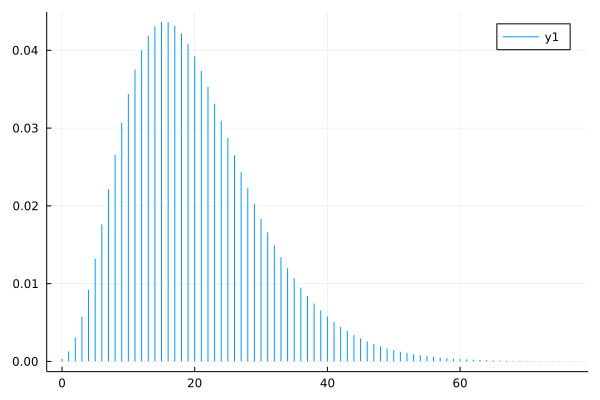

In [1]:
using Distributions
using StatsPlots
plot(NegativeBinomial(5, 0.2))

In [3]:
@doc NegativeBinomial

```
NegativeBinomial(r,p)
```

A *Negative binomial distribution* describes the number of failures before the `r`th success in a sequence of independent Bernoulli trials. It is parameterized by `r`, the number of successes, and `p`, the probability of success in an individual trial.

$$
P(X = k) = {k + r - 1 \choose k} p^r (1 - p)^k, \quad \text{for } k = 0,1,2,\ldots.
$$

The distribution remains well-defined for any positive `r`, in which case

$$
P(X = k) = \frac{\Gamma(k+r)}{k! \Gamma(r)} p^r (1 - p)^k, \quad \text{for } k = 0,1,2,\ldots.
$$

```julia
NegativeBinomial()        # Negative binomial distribution with r = 1 and p = 0.5
NegativeBinomial(r, p)    # Negative binomial distribution with r successes and success rate p

params(d)       # Get the parameters, i.e. (r, p)
succprob(d)     # Get the success rate, i.e. p
failprob(d)     # Get the failure rate, i.e. 1 - p
```

External links:

  * [Negative binomial distribution on Wolfram](https://reference.wolfram.com/language/ref/NegativeBinomialDistribution.html)

Note: The definition of the negative binomial distribution in Wolfram is different from the [Wikipedia definition](http://en.wikipedia.org/wiki/Negative_binomial_distribution). In Wikipedia, `r` is the number of failures and `k` is the number of successes.


In [26]:
function plot_negbin(k, θ)
    negbin = NegativeBinomial(k, θ)
    @show k, θ
    @show μ = k + mean(negbin)
    @show σ = std(negbin)
    @show (k - 1)/θ
    i = max(0, round(Int, mean(negbin) - 5σ)):round(Int, mean(negbin) + 5σ)
    @show i
    @show k .+ i
    bar(k .+ i, pdf.(negbin, i))
end

plot_negbin (generic function with 1 method)

(k, θ) = (4.6, 0.3333333333333333)
μ = k + mean(negbin) = 13.8
σ = std(negbin) = 5.253570214625479
(k - 1) / θ = 10.799999999999999
i = 0:35
k .+ i = 4.6:1.0:39.6


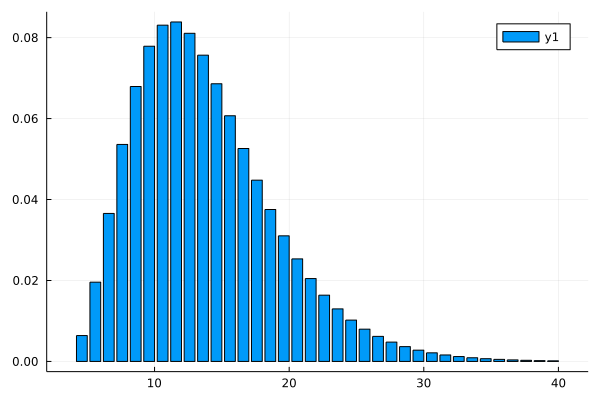

In [29]:
plot_negbin(4.6, 1/3)

In [30]:
kurtosis(Beta(0.1, 0.1))

-1.875

In [31]:
kurtosis(Bernoulli(0.5))

-2.0

In [32]:
kurtosis(Uniform())

-1.2

In [33]:
kurtosis(Beta(0.5, 0.5))

-1.5

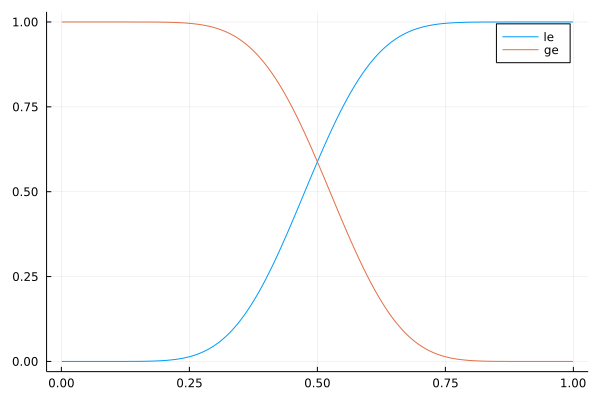

In [38]:
using Roots

pval_le(dist, k) = ccdf(dist, k - 1)
pval_ge(dist, k) = cdf(dist, k)

n = 20
θ = 0.001:0.001:0.999
k = 10
p_le = (θ -> pval_le(Binomial(n, θ), k)).(θ)
p_ge = (θ -> pval_ge(Binomial(n, θ), k)).(θ)
plot(θ, p_le; label="le")
plot!(θ, p_ge; label="ge")